In [38]:
%pylab inline

import glob
import matplotlib
import numpy as np
from scipy.stats import gamma
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/single_sim/'

Populating the interactive namespace from numpy and matplotlib


In [39]:
def main():
    
    means = [10**-5, 10**-4, 10**-3, 10**-2]
    pers = [2, 3, 4]
    per = 4
    list_of_s = []
    diff_min = []
    diff_max = []
    
    legend_labels = []
    for mean in means:
        #for per in pers:
        for j in range(0,3):
            file_list = glob.glob('./results/validation/single_sim/per_%d*_%.5f.txt'%(per, mean)) # narrow_prior 
            file_list.sort()
            #print('./results/validation/fig2c/per_%d*_%.5f'%(per, mean))
            filename = file_list[j]
            allele_freqs_file = open(filename, 'r')
            lines = allele_freqs_file.readlines()

            line = lines[13]       
            info = line.strip().split(': ')
            est_mean = float(info[1])
            list_of_s.append(est_mean)
            line = lines[14]       
            info = line.strip().split(': ')
            lower = float(info[1])
            line = lines[15]       
            info = line.strip().split(': ')
            upper = float(info[1])
            diff_min.append(est_mean - lower)
            diff_max.append(upper - est_mean)
            #x_axis_labels.append(r"$k_{%d},\Theta_{%d}$"%(i,i))
            line = lines[1]
            info = line.strip().split(' ')
            #print(info)
            k = float(info[7])
            theta = float(info[10])
            legend_labels.append('(%.1E,%.1E)'%(k,theta))
            
    plt.figure(1, figsize=(12, 6))
    #x_axis_labels = ('10^-5','10^-5','10^-5','10^-4','10^-4','10^-4','10^-3','10^-3','10^-3','10^-2','10^-2','10^-2')
    y_pos = np.arange(len(legend_labels))
    
    plt.errorbar(y_pos[0:3], list_of_s[0:3], yerr=[diff_min[0:3],diff_max[0:3]], marker = 'o', ls = '--', c='red') 
    plt.errorbar(y_pos[3:6], list_of_s[3:6], yerr=[diff_min[3:6],diff_max[3:6]], marker = 'o',ls = '--', c='red') 
    plt.errorbar(y_pos[6:9], list_of_s[6:9], yerr=[diff_min[6:9],diff_max[6:9]], marker = 'o',ls = '--', c='red') 
    plt.errorbar(y_pos[9:12], list_of_s[9:12], yerr=[diff_min[9:12],diff_max[9:12]], marker = 'o',ls = '--', c='red') 
    plt.xticks(y_pos, legend_labels, rotation = 35)
    plt.yscale('log')
    plt.ylabel("Estimated s")
    
    plt.axvline(x=2.5, linestyle = '--')
    plt.axvline(x=5.5, linestyle = '--')
    plt.axvline(x=8.5, linestyle = '--')
    plt.text(0.7,10**-7.3,r'$s=10^{-5}$')
    plt.text(3.7,10**-7.3,r'$s=10^{-4}$')
    plt.text(6.7,10**-7.3,r'$s=10^{-3}$')
    plt.text(9.7,10**-7.3,r'$s=10^{-2}$')
    plt.ylim(10**-6, 10**-1)
    plt.title('Joint method validation: Period %d\nMedian estimate with 95 percent CI'%(per))
    plt.savefig(PLOTDIR + 'per_%d.pdf'%(per),bbox_inches='tight')
    #plt.legend(x_axis_labels, legend_labels)
    plt.show()

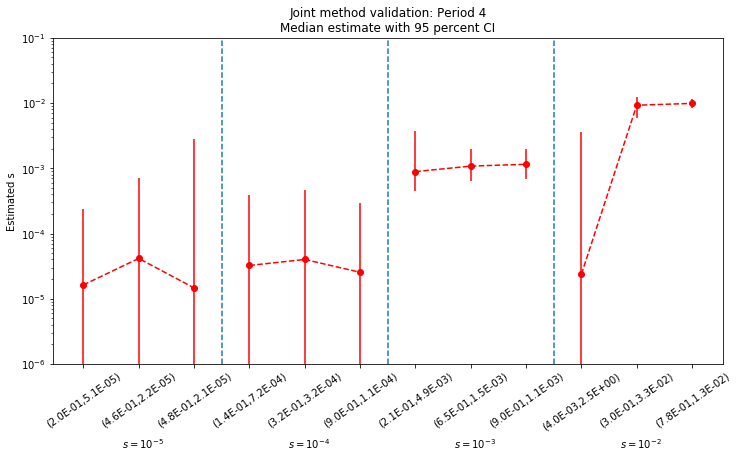

CPU times: user 1.91 s, sys: 26.2 ms, total: 1.93 s
Wall time: 3.84 s


In [40]:
%%time
if __name__ == '__main__':
    main()